<a href="https://www.kaggle.com/code/umutky/titanic-getting-started?scriptVersionId=141851844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Overview

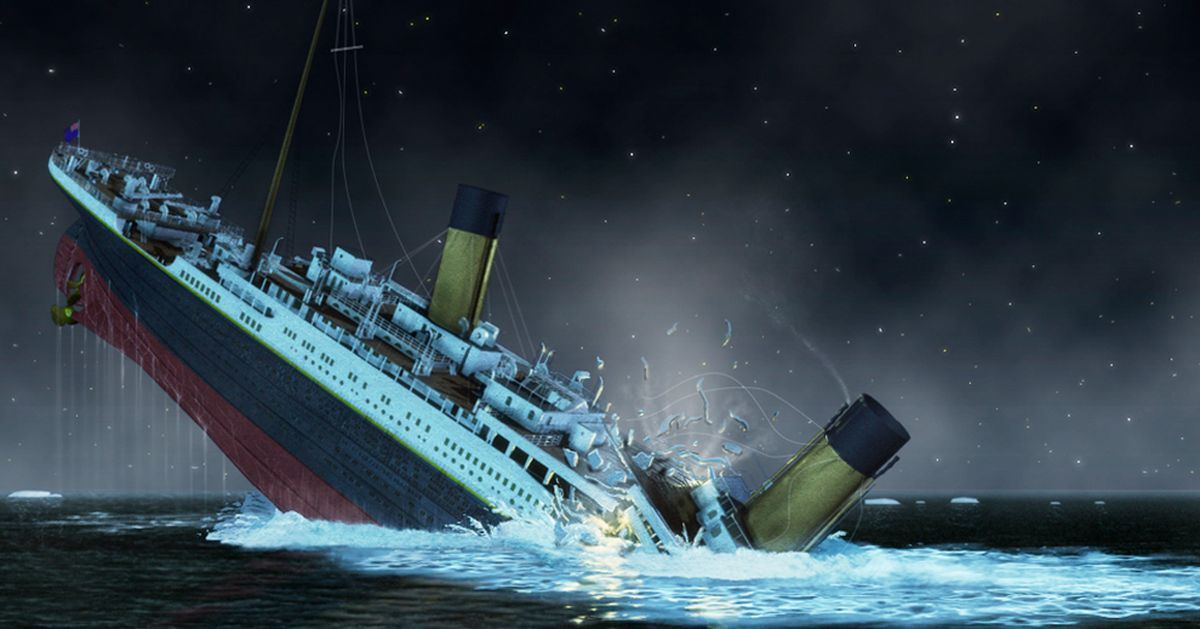


**Goal:** It is your job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

* PassengerId: Passenger number.
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class).
* Name: Passenger's name.
* Sex: Gender.
* Age: Age.
* SibSp: Number of siblings/spouses on board.
* Parch: Number of parents/children on board.
* Ticket: Ticket number.
* Fare: Paid fare.
* Cabin: Cabin number.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore') # ignore warnings.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Collecting the data

I loaded the train and test datasets using Pandas. Additionally, I made a copy of the train dataset as 'df' since I will be performing operations on it.

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv") # Train
df = train.copy()                                      # Copy of train dataset.
test = pd.read_csv("/kaggle/input/titanic/test.csv")   # Test


# 3. Exploratory Data Analysis (EDA)

## 3.1. General Info about data.

In [4]:
print(df.shape) # Shape of the train dataset.
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(test.shape) # Shape of the test dataset.
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df.describe().style.background_gradient(cmap="Blues")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
test.describe().style.background_gradient(cmap="Blues")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## 3.2. Changing the variable type.

In this section, we are changing the variable type of variables that represent a categorical state, even though they are numeric.
- Pclass.

In [12]:
# Pclass 1st>2nd>3rd.
df["Pclass"] = df["Pclass"].astype("category")
df["Pclass"] = pd.Categorical(df["Pclass"], categories=[1,2,3], ordered=True)
# Survived column actually categorical data. Survive = 1, Died = 0
df["Survived"] = df["Survived"].astype("category")

-------------------------------- % of Survived ----------------------------
0    61.616162
1    38.383838
Name: Survived, dtype: float64
---------------------------- Countplot of Survived -----------------------------


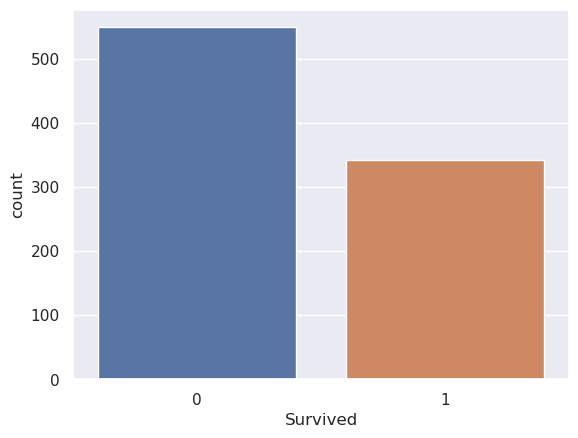

---------------------------- Piechart of Survived ----------------------------


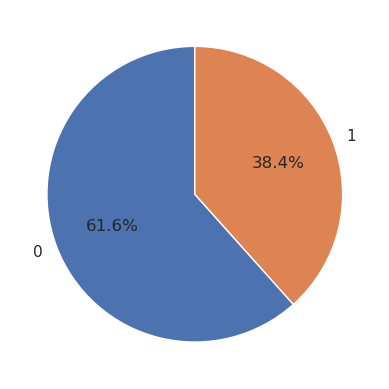

-------------------------------- % of Pclass ----------------------------
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
---------------------------- Countplot of Pclass -----------------------------


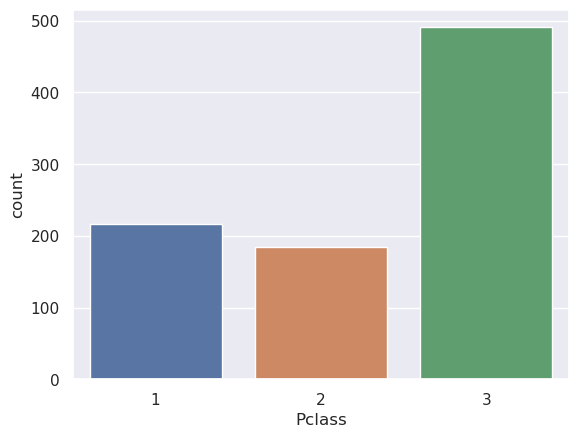

---------------------------- Piechart of Pclass ----------------------------


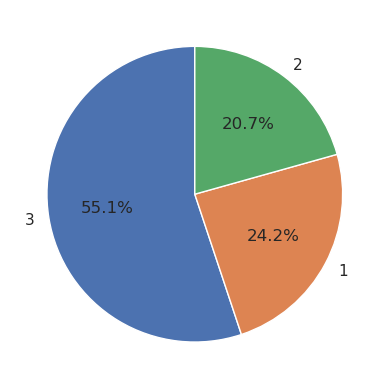

-------------------------------- % of Sex ----------------------------
male      64.758698
female    35.241302
Name: Sex, dtype: float64
---------------------------- Countplot of Sex -----------------------------


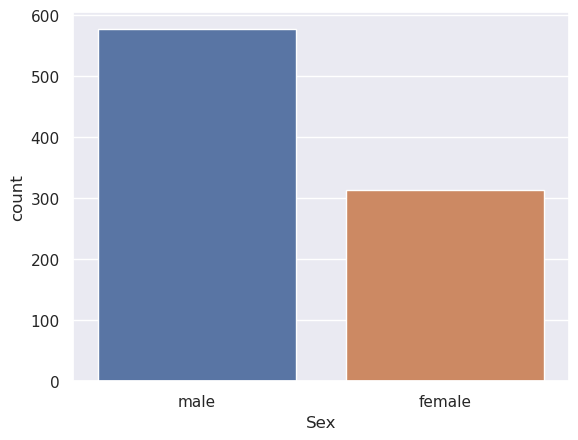

---------------------------- Piechart of Sex ----------------------------


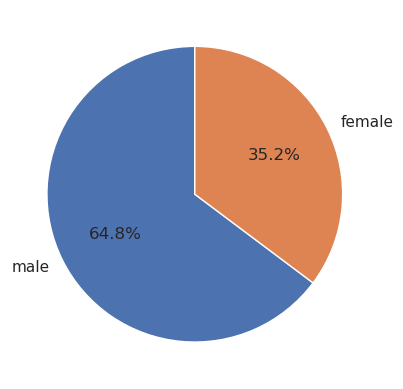

-------------------------------- % of Embarked ----------------------------
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64
---------------------------- Countplot of Embarked -----------------------------


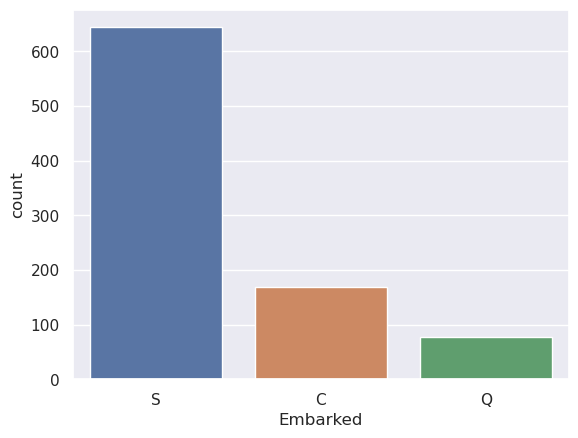

---------------------------- Piechart of Embarked ----------------------------


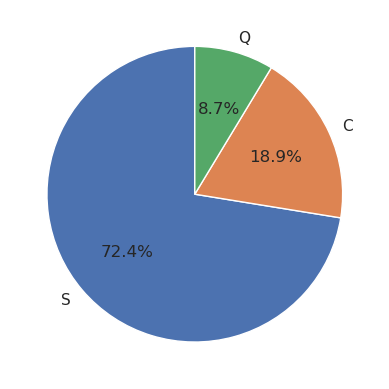

In [13]:
# General looking a cateorical variables.

# Costumization of plot.
sns.set(style="darkgrid") # sets the background
sns.set_context("notebook") # sets the context for the plot
sns.set_palette("deep") # sets the color palette for the plot
columns = ["Survived","Pclass", "Sex", "Embarked"]
for i in columns:
    print(f"-------------------------------- % of {i} ----------------------------")
    print(df[i].value_counts(normalize=True)*100)
    print(f"---------------------------- Countplot of {i} -----------------------------")
    sns.countplot(df, x=i)
    plt.show()
    print(f"---------------------------- Piechart of {i} ----------------------------")
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', startangle=90)
    plt.show()

---------------------------- Histogram of PassengerId  -----------------------------


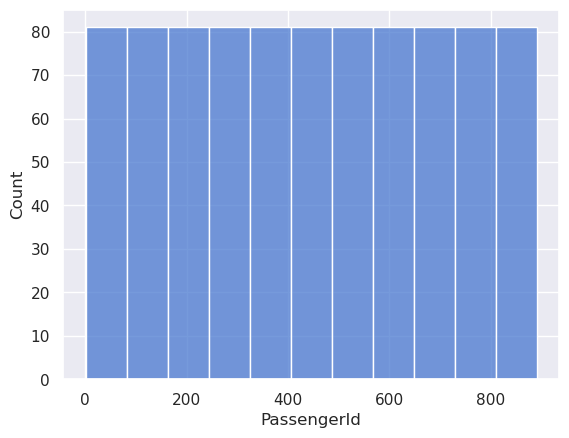

---------------------------- Boxplot of PassengerId -----------------------------


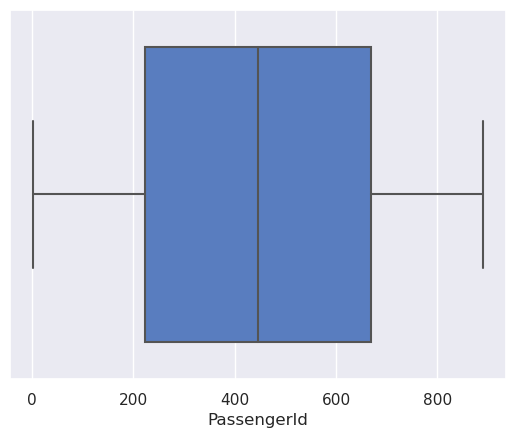

---------------------------- Violin plot of PassengerId -----------------------------


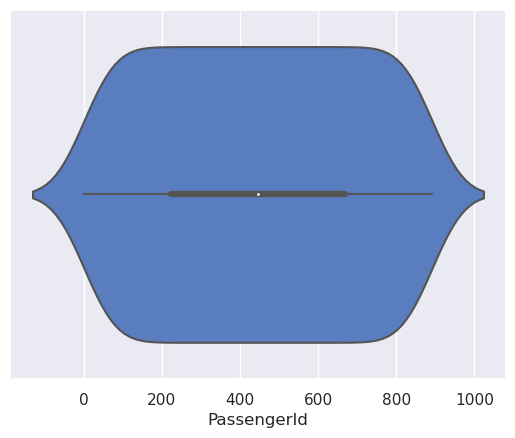

---------------------------- Histogram of Age  -----------------------------


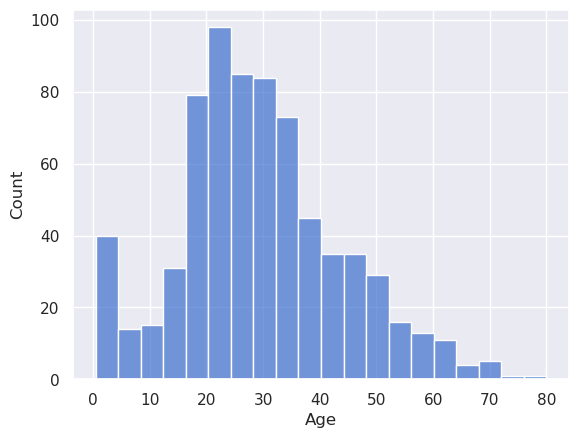

---------------------------- Boxplot of Age -----------------------------


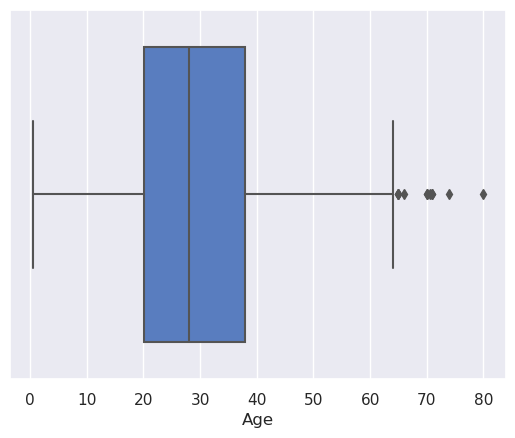

---------------------------- Violin plot of Age -----------------------------


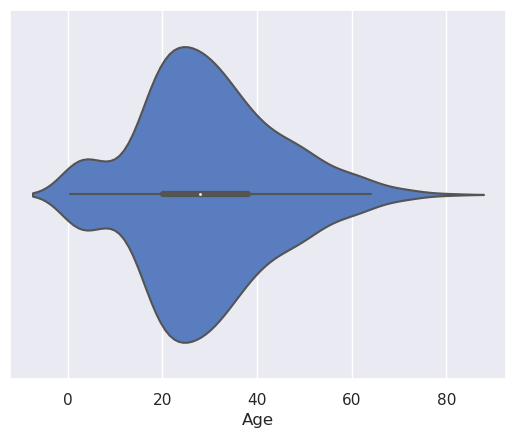

---------------------------- Histogram of SibSp  -----------------------------


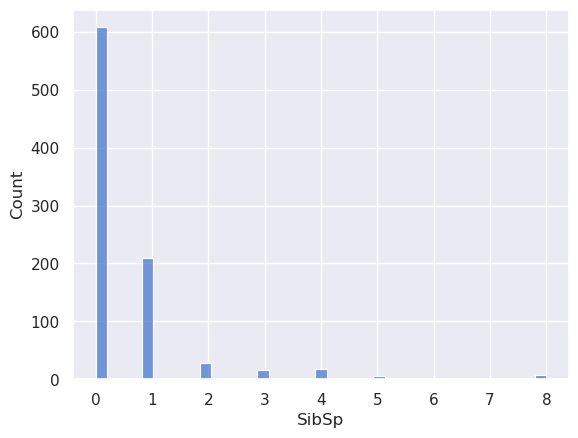

---------------------------- Boxplot of SibSp -----------------------------


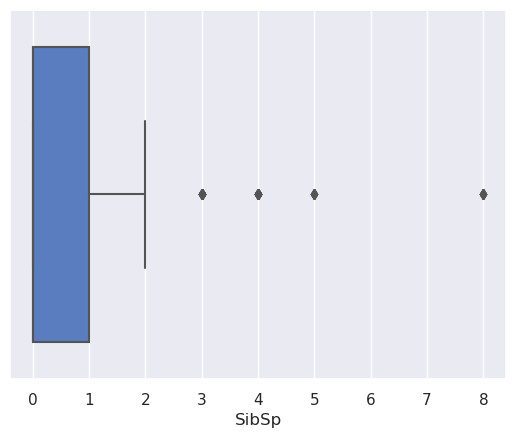

---------------------------- Violin plot of SibSp -----------------------------


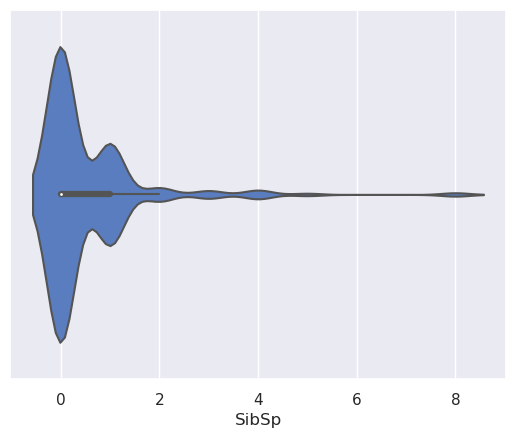

---------------------------- Histogram of Parch  -----------------------------


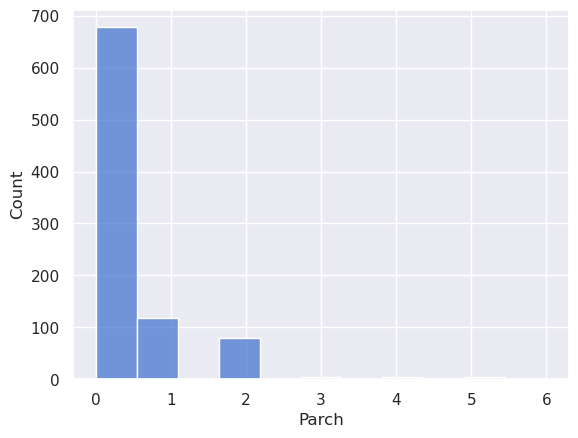

---------------------------- Boxplot of Parch -----------------------------


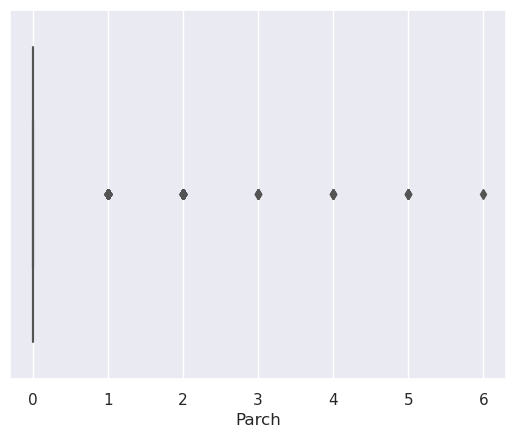

---------------------------- Violin plot of Parch -----------------------------


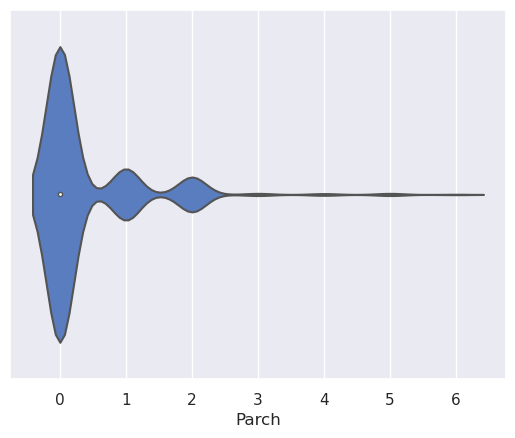

---------------------------- Histogram of Fare  -----------------------------


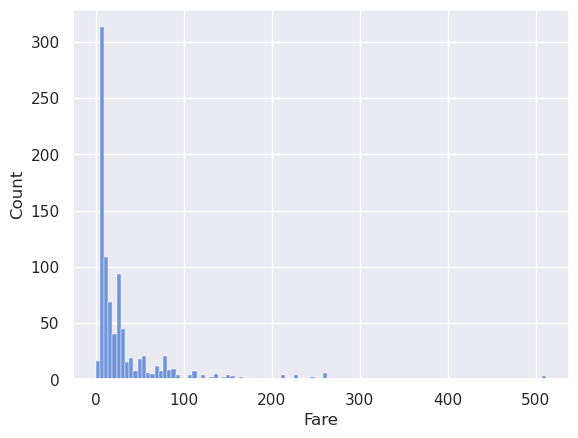

---------------------------- Boxplot of Fare -----------------------------


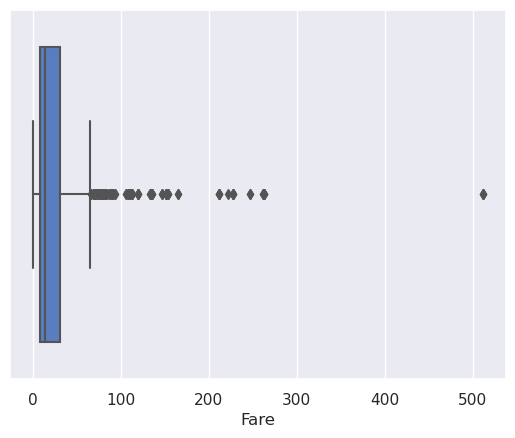

---------------------------- Violin plot of Fare -----------------------------


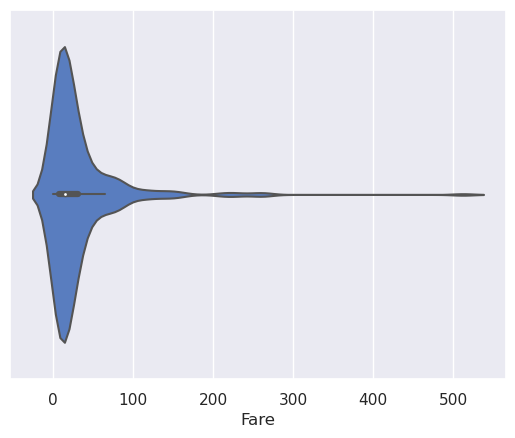

In [14]:
# General looking of continuous variables.
# Costumization of plot.
sns.set(style="darkgrid") # sets the background
sns.set_context("notebook") # sets the context for the plot
sns.set_palette("muted") # sets the color palette for the plot

for i in df.select_dtypes(include=["int", "float"]).columns:
    print(f"---------------------------- Histogram of {i}  -----------------------------")
    sns.histplot(df, x=i)
    plt.show()
    print(f"---------------------------- Boxplot of {i} -----------------------------")
    sns.boxplot(df,x=i)
    plt.show()
    print(f"---------------------------- Violin plot of {i} -----------------------------")
    sns.violinplot(df, x=i)
    plt.show()

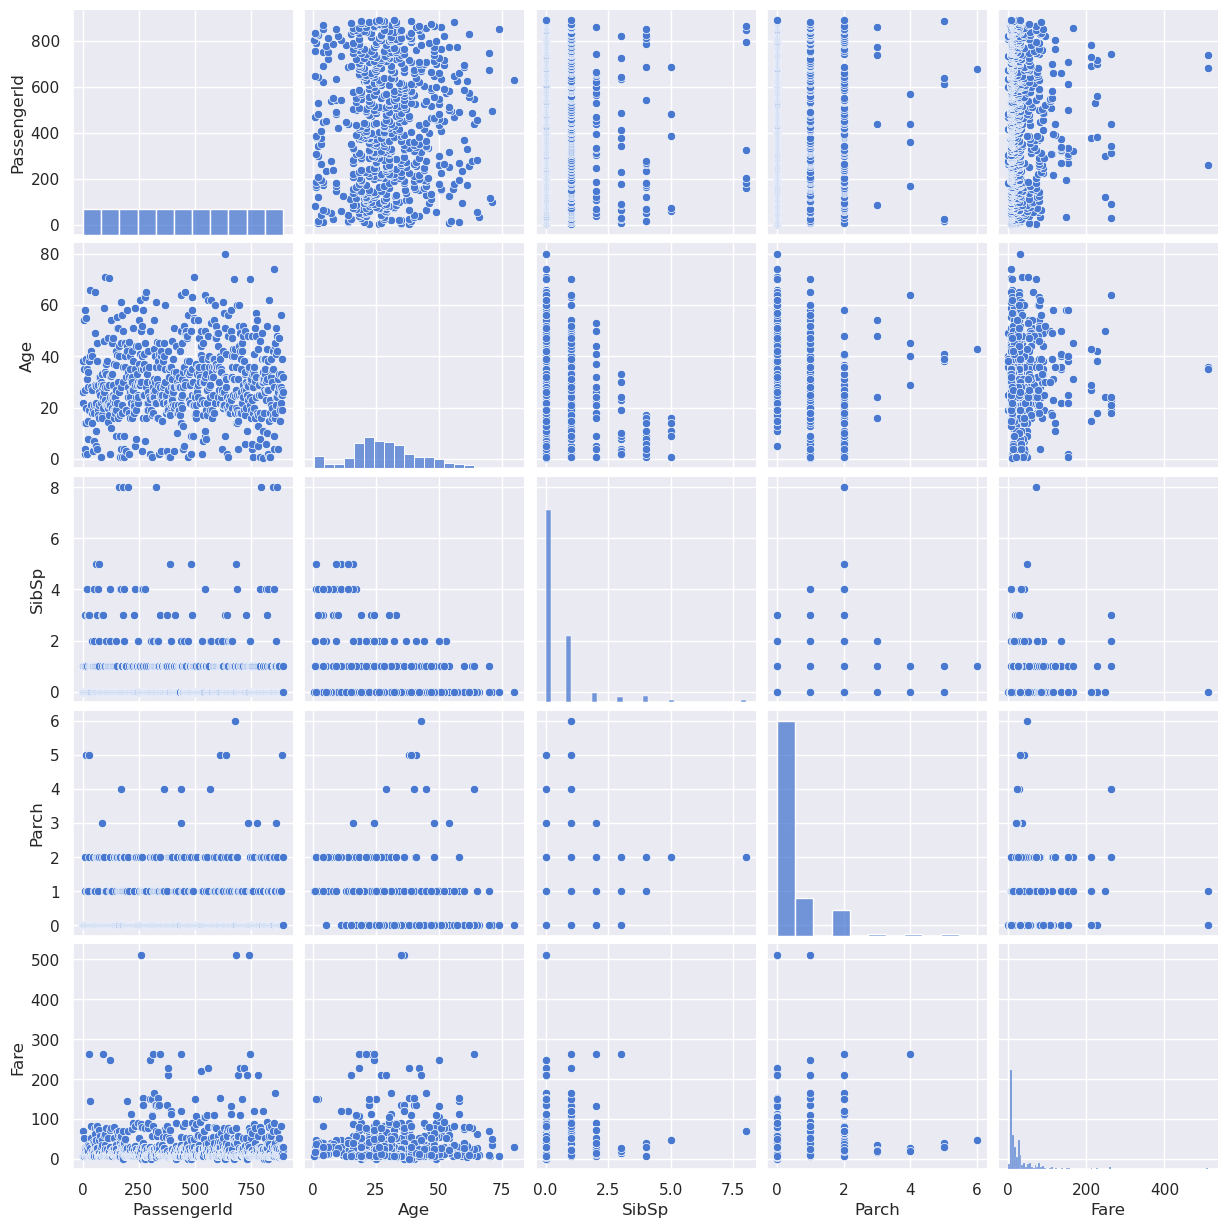

In [15]:
# Pairplot
sns.pairplot(df, kind="scatter")

<Axes: >

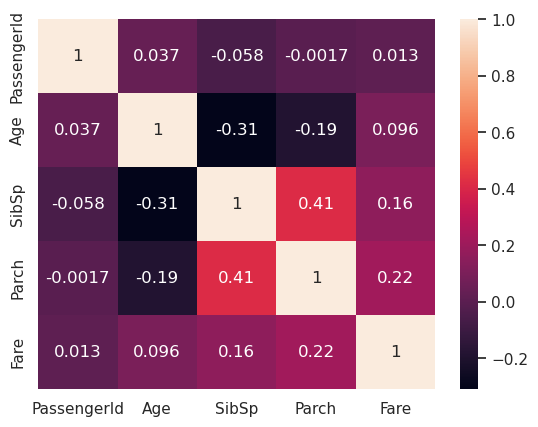

In [16]:
#Heatmap
sns.heatmap(df.corr() , annot = True)

**Examine the train dataset based on "Survived".**

In [17]:
survived_sex = df.groupby("Survived")["Sex"].value_counts()/sum(df.groupby("Survived")["Sex"].value_counts())*100
survived_sex

Survived  Sex   
0         male      52.525253
          female     9.090909
1         female    26.150393
          male      12.233446
Name: Sex, dtype: float64

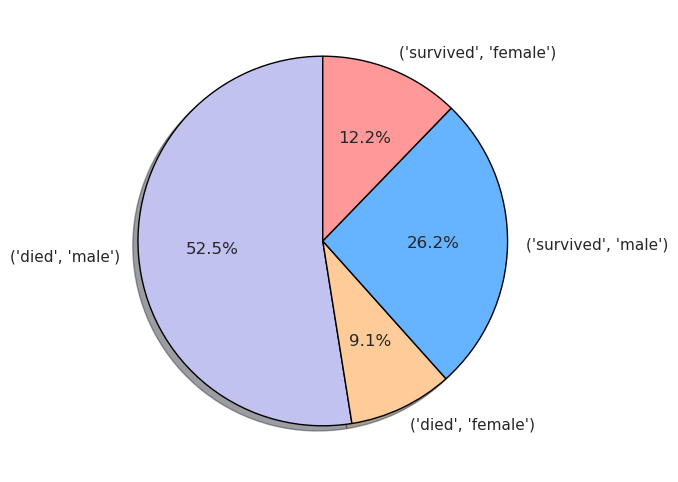

In [18]:
# Survival percentages of passengers by gender

# Data
labels = [("died", "male"),
          ("died", "female"),
          ("survived", "male"),
          ("survived", "female")]
sizes = survived_sex.values
colors = ['#c2c2f0', '#ffcc99', '#66b3ff', '#ff9999']
# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.show()

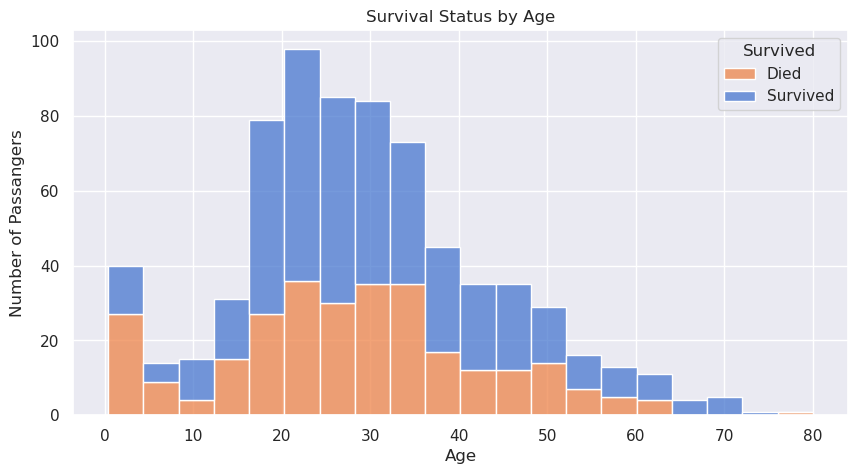

In [19]:
# Histogram chart showing the number of surviving and deceased passengers by age.
plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", common_norm=False)
plt.xlabel('Age')
plt.ylabel('Number of Passangers')
plt.title('Survival Status by Age')
plt.legend(title='Survived', labels=['Died', 'Survived'])
plt.show()

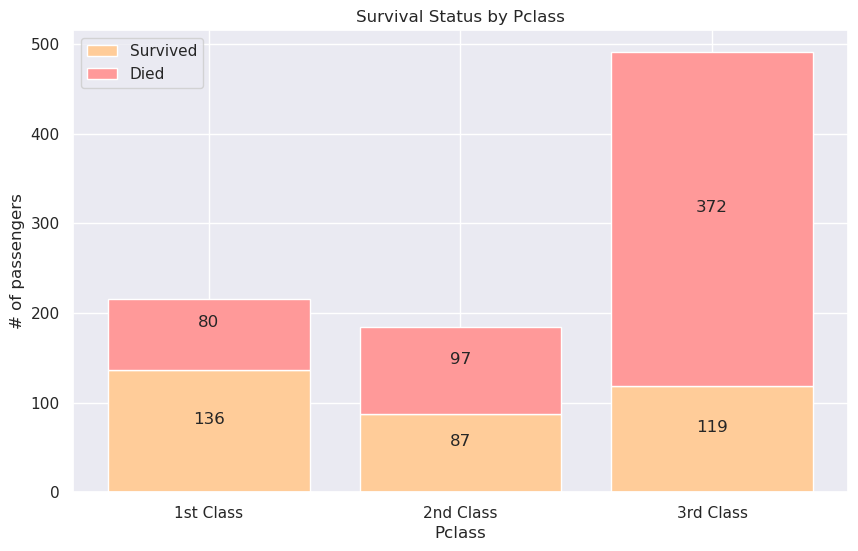



Correlation between Survived and Pclass
 -0.3384810359610148


In [20]:
# Group the data and count values based on class and survival status
class_counts = df.groupby(["Survived", "Pclass"]).size().unstack(fill_value=0)

# Class labels
pclass_labels = ["1st Class", "2nd Class", "3rd Class"]

# Get counts of passengers who survived and died separately
survived_counts = class_counts.loc[1]
died_counts = class_counts.loc[0]

# Create a stacked bar chart with 'survived_counts' on top of 'died_counts'
plt.figure(figsize=(10, 6))
bars1 = plt.bar(pclass_labels, survived_counts, label="Survived", color="#ffcc99")
bars2 = plt.bar(pclass_labels, died_counts, label="Died", bottom=survived_counts, color="#ff9999")

# Add passenger counts in the middle of the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    plt.annotate('{}'.format(int(height1)), 
                 xy=(bar1.get_x() + bar1.get_width() / 2, height1 / 2),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
    plt.annotate('{}'.format(int(height2)), 
                 xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Customize the chart properties
plt.xlabel('Pclass')
plt.ylabel('# of passengers')
plt.title('Survival Status by Pclass')
plt.legend()

plt.show()

print("\n\nCorrelation between Survived and Pclass\n",df['Survived'].corr(df['Pclass']))

**When we look at this graph, we can say that the death rate of passengers with Pclass = 3 is higher. However, is the sole reason for this the ticket class of passengers? Or does the gender distribution vary by ticket class? To find out, let's create another graph.**


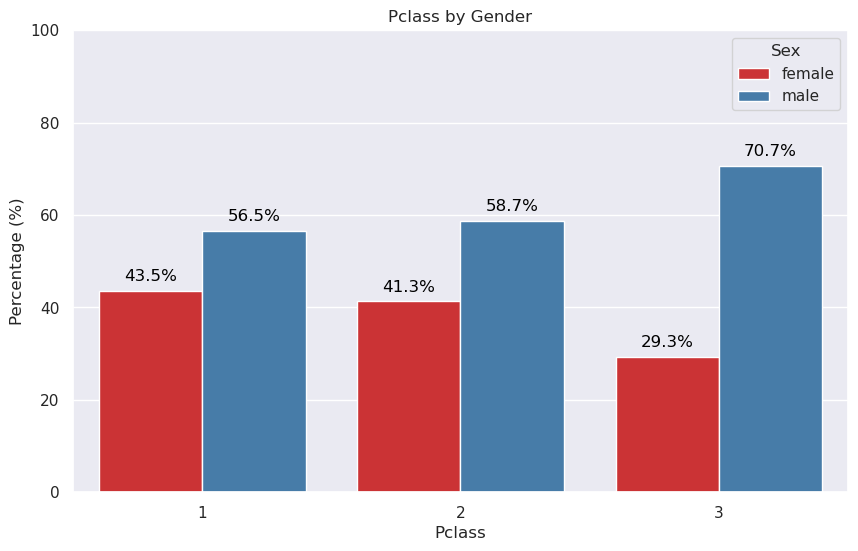

In [21]:
data = {
    'Pclass': [1, 1, 2, 2, 3, 3],
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Count': [122, 94, 108, 76, 347, 144]
}

# Convert the data into a DataFrame
data_f = pd.DataFrame(data)

# Group the data by 'Pclass' and 'Sex', then calculate the total passenger count
grouped_data = data_f.groupby(['Pclass', 'Sex'])['Count'].sum().reset_index()

# Calculate the total passenger count for each Pclass
total_passengers = grouped_data.groupby('Pclass')['Count'].transform('sum')

# Calculate the percentage of passengers and add it to the DataFrame
grouped_data['Percentage'] = (grouped_data['Count'] / total_passengers) * 100

# Create a bar plot using sns.barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Pclass', y='Percentage', hue='Sex', palette='Set1')

# Add percentage values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize the plot
plt.xlabel('Pclass')
plt.ylabel('Percentage (%)')
plt.title('Pclass by Gender')

# Set the Y axis limit to 100
plt.ylim(0, 100)

# Show the plot
plt.show()

**We can infer that the death percentages of passengers based on their ticket classes were influenced by the number of male passengers on board during the Titanic disaster. This is because during the Titanic disaster, female passengers were given priority in evacuations, resulting in a significantly higher mortality rate among male passengers.**

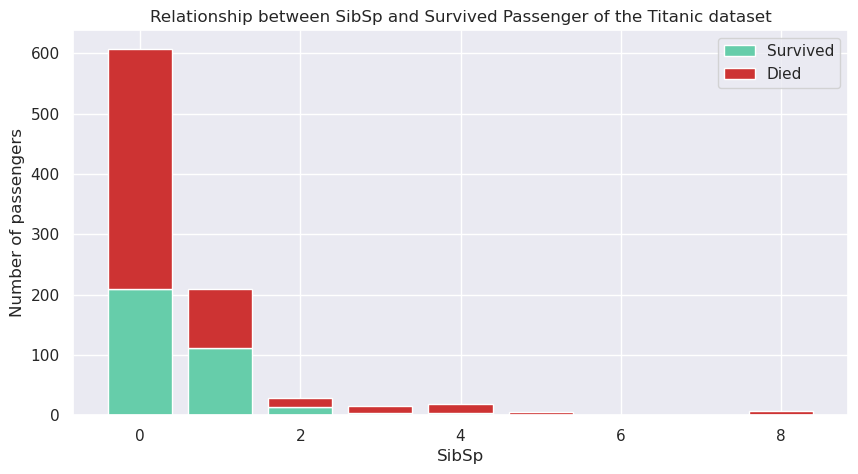

SibSp  Survived
0      0           0.654605
       1           0.345395
1      0           0.464115
       1           0.535885
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
       1           0.000000
8      0           1.000000
       1           0.000000
Name: Survived, dtype: float64


Correlation between Survived and SibSp
 -0.03532249888573564


In [22]:
group = df.groupby(["SibSp", "Survived"])["PassengerId"].count().reset_index()
pivot = group.pivot(index="SibSp", columns="Survived", values="PassengerId").fillna(0)
pivot

fig, ax = plt.subplots(figsize=(10, 5))

bar1 = ax.bar(pivot.index, pivot[1], label="Survived", color="#66CDAA")
bar2 = ax.bar(pivot.index, pivot[0], label="Died", color="#CD3333", bottom=pivot[1])

ax.set_xlabel("SibSp")
ax.set_ylabel("Number of passengers")
ax.set_title("Relationship between SibSp and Survived Passenger of the Titanic dataset")
ax.legend()

plt.show()

print(df.groupby("SibSp")["Survived"].value_counts(normalize=True).sort_index(level=["SibSp", "Survived"]))
print("\n\nCorrelation between Survived and SibSp\n",df['Survived'].corr(df['SibSp']))

**We have observed that there is a weak negative correlation between the 'SibSp' value and the survival chances of passengers, both visually and numerically.**

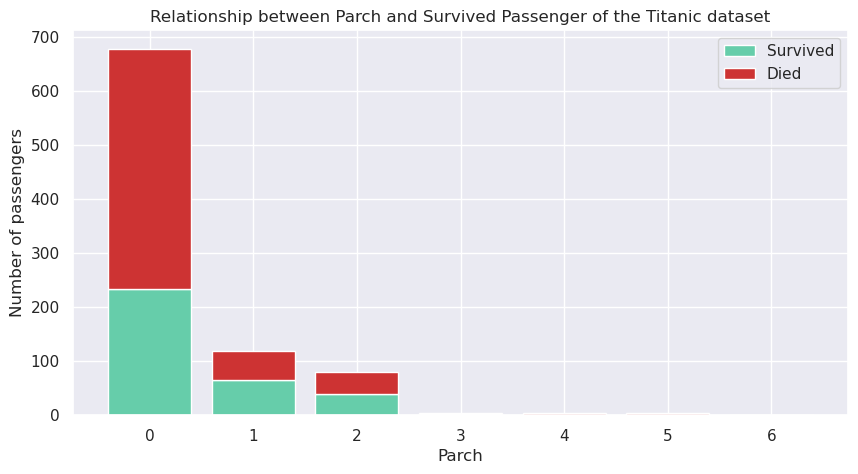



Correlation between Survived and Parch
 0.08162940708348371


In [23]:
group = df.groupby(["Parch", "Survived"])["PassengerId"].count().reset_index()
pivot = group.pivot(index="Parch", columns="Survived", values="PassengerId").fillna(0)

fig, ax = plt.subplots(figsize=(10, 5))

bar1 = ax.bar(pivot.index, pivot[1], label="Survived", color="#66CDAA")
bar2 = ax.bar(pivot.index, pivot[0], label="Died", color="#CD3333", bottom=pivot[1])

ax.set_xlabel("Parch")
ax.set_ylabel("Number of passengers")
ax.set_title("Relationship between Parch and Survived Passenger of the Titanic dataset")
ax.legend()

plt.show()

print("\n\nCorrelation between Survived and Parch\n",df['Survived'].corr(df['Parch']))

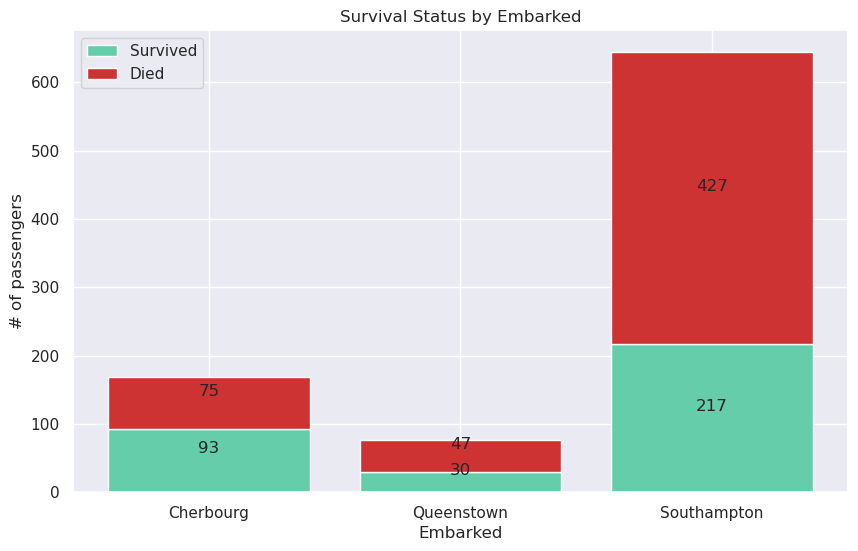

In [24]:
# Group the data and count values based on class and survival status
class_counts = df.groupby(["Survived", "Embarked"]).size().unstack(fill_value=0)

# Class labels
embarked_labels = ["Cherbourg", "Queenstown", "Southampton"]

# Get counts of passengers who survived and died separately
survived_counts = class_counts.loc[1]
died_counts = class_counts.loc[0]

# Create a stacked bar chart with 'survived_counts' on top of 'died_counts'
plt.figure(figsize=(10, 6))
bars1 = plt.bar(embarked_labels, survived_counts, label="Survived", color="#66CDAA")
bars2 = plt.bar(embarked_labels, died_counts, label="Died", bottom=survived_counts, color="#CD3333")

# Add passenger counts in the middle of the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    total_height = height1 + height2
    plt.annotate('{}'.format(int(height1)), 
                 xy=(bar1.get_x() + bar1.get_width() / 2, height1 / 2),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
    plt.annotate('{}'.format(int(height2)), 
                 xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Customize the chart properties
plt.xlabel('Embarked')
plt.ylabel('# of passengers')
plt.title('Survival Status by Embarked')
plt.legend()

plt.show()

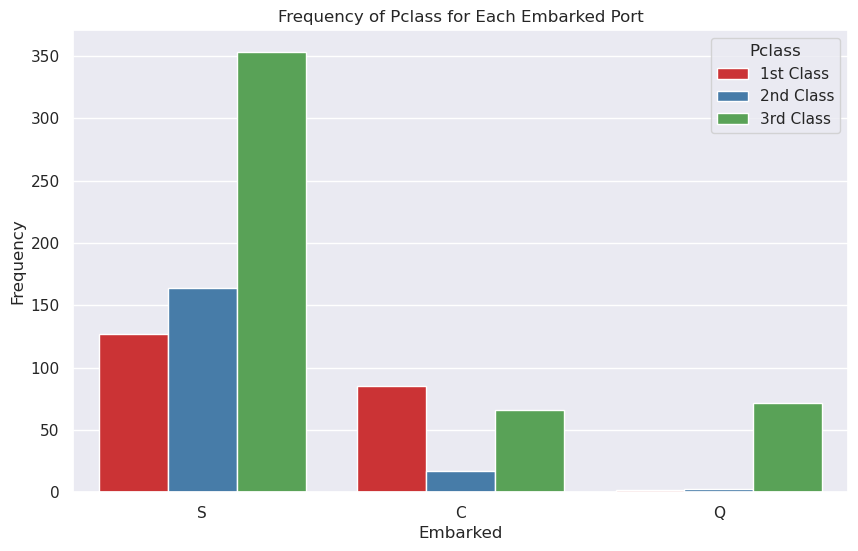

In [25]:
data = {'Embarked': ['S', 'C', 'S', 'Q', 'C', 'S', 'S', 'C', 'Q'],
        'Pclass': [1, 2, 3, 1, 2, 3, 1, 2, 3]}

data_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Pclass', palette='Set1')

plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Frequency of Pclass for Each Embarked Port')
plt.legend(title='Pclass', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])

plt.show()

## 3.2. Missing Value and Duplicate Control

- We have 177 missing data in "Age" column, 
- 687 missing data in "Cabin" column, 
- 2 missing data in "Embarked".

In [26]:
df = train.copy()
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Duplicate Control**

In [27]:
# There are no duplicate observations.
df.duplicated().sum()

0

   **Age Column:** Approximately 20% of the data in the "Age" column contains missing values (NA). In this case, it is reasonable to perform imputation by replacing these missing values. Imputation ensures that we retain valuable information from the remaining data points while addressing the missing values, allowing us to continue with our analysis without losing a significant portion of the dataset.

   **Cabin Column:** Given that nearly 80% of the data in the "Cabin" column consists of missing values, it is a considerable proportion of the dataset that lacks information. Therefore, it is a practical decision to drop this column entirely. The large amount of missing data suggests that the column may not provide meaningful insights for analysis.

   **Cabin Column :** For the small fraction of NULL values in the "Cabin" column, removing the corresponding observations entirely is a reasonable choice. Since this subset of data is missing both cabin information and may potentially contain other missing data, removing these rows ensures data consistency and simplifies subsequent analysis.

In [28]:
col_with_na = df.columns[df.isnull().any()].tolist()
for i in col_with_na:
    print(f"NA values %{(1-(df[i].count()/len(df)))} of {i}")

NA values %0.19865319865319864 of Age
NA values %0.771043771043771 of Cabin
NA values %0.002244668911335568 of Embarked


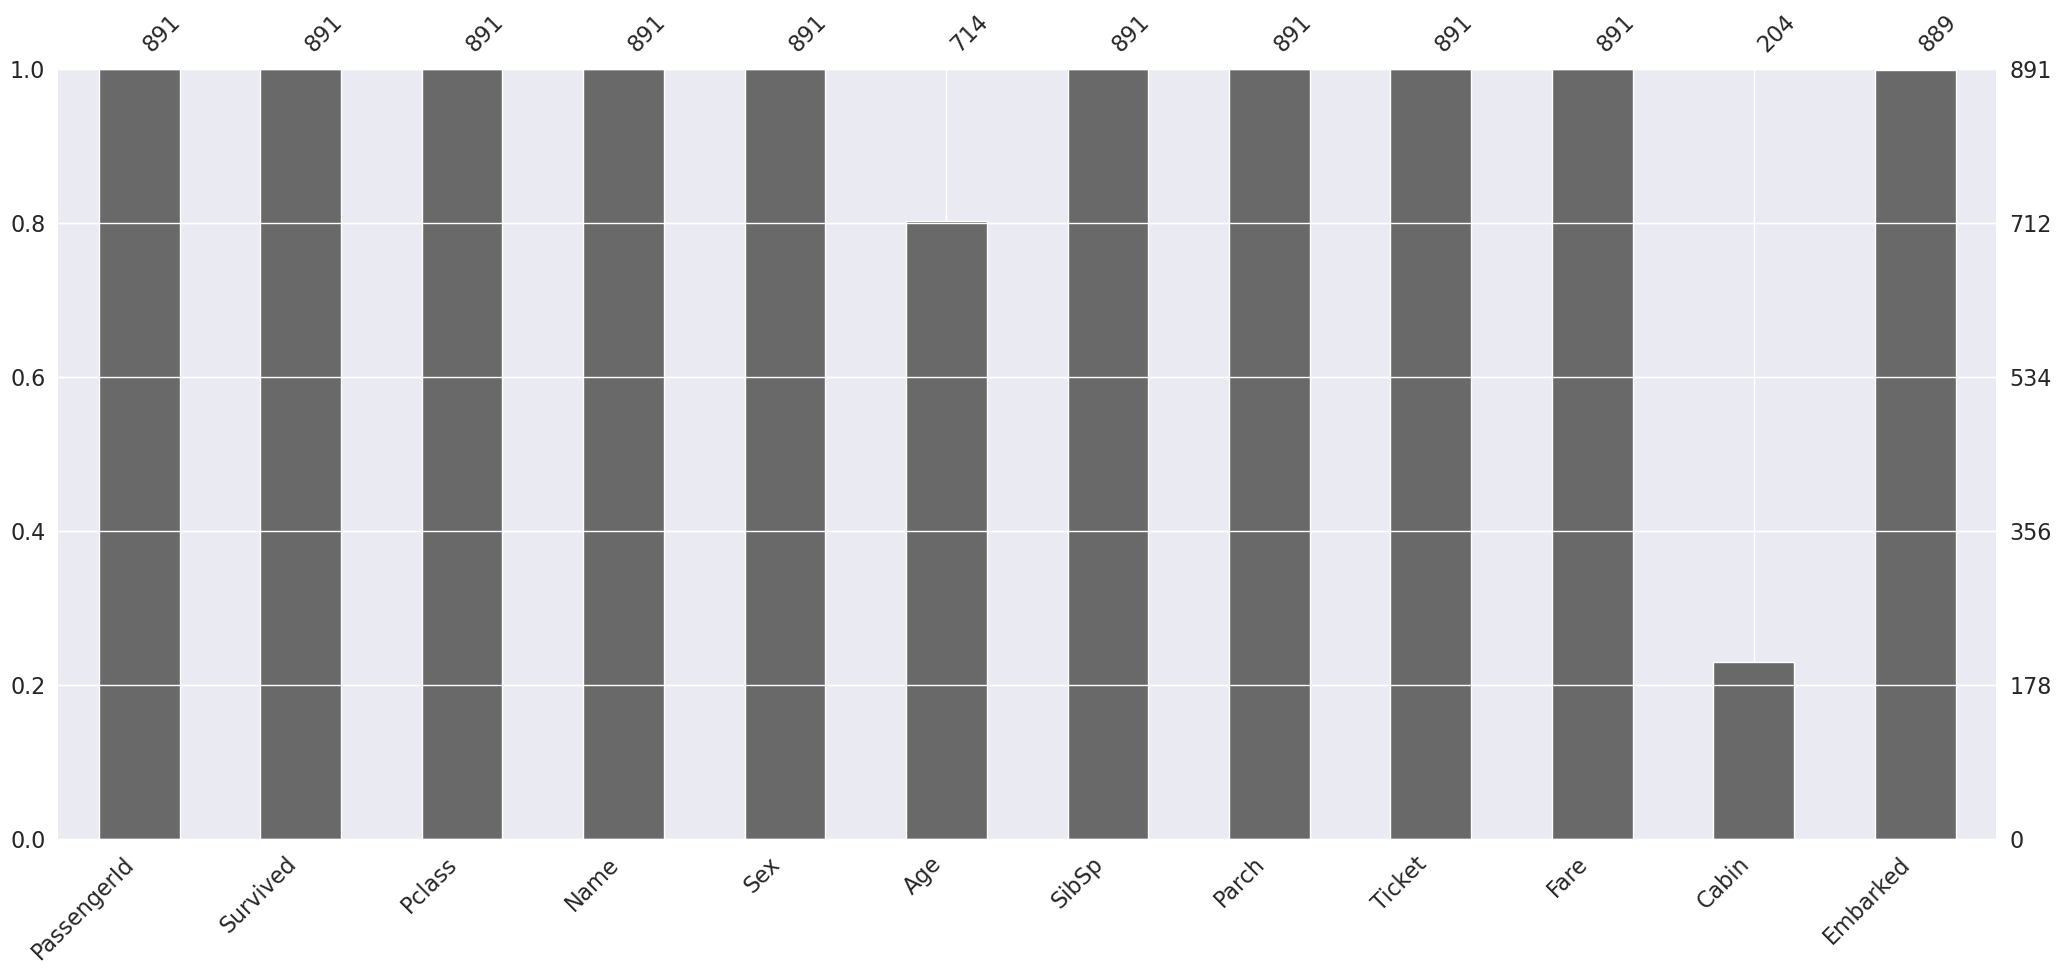

In [29]:
# Visualize the status of missing values using the "missingno".
msno.bar(df);

In [30]:
# Deleted the Cabin column
df_clean = df.drop("Cabin", axis=1)
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
# Get the observations with missing values in the "Embarked" column.
embarked_na_index = df_clean[df_clean["Embarked"].isnull()].index
print(embarked_na_index)

# We are dropping these observations.
df_clean = df_clean.drop(index=embarked_na_index, axis=0).reset_index()
df_clean.head()

Int64Index([61, 829], dtype='int64')


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The logic behind assigning values to NA observations in the "Age" column is as follows:

In situations where data is missing (NA), it's important to handle these missing values in a way that allows for meaningful analysis. In the case of the "Age" column, replacing missing values with a suitable statistic like the median is a common approach. This helps maintain the integrity of the dataset and ensures that calculations and analyses are not unduly influenced by the missing values. Using the median in this context is particularly helpful because it is less sensitive to extreme values or skewness in the data compared to the mean, making it a more robust choice for imputation.

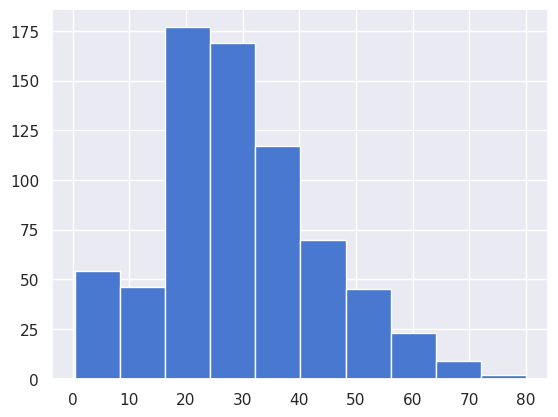

In [32]:
# Histogram of Age column.
df_clean["Age"].hist()
plt.show()

In [33]:
# Get the indices of NA values in the Age column.
age_na_index = df_clean[df_clean["Age"].isnull()].index

# Calculate the median of the Age column.
median_age = df_clean["Age"].median()

# Replace the missing values in the Age column with the median.
for i in age_na_index:
    df_clean["Age"][i] = median_age

In [34]:
df_clean = df_clean.drop(columns=["index"], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [35]:
# Performing the NA (Missing Value) check again
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3.3. Outliers

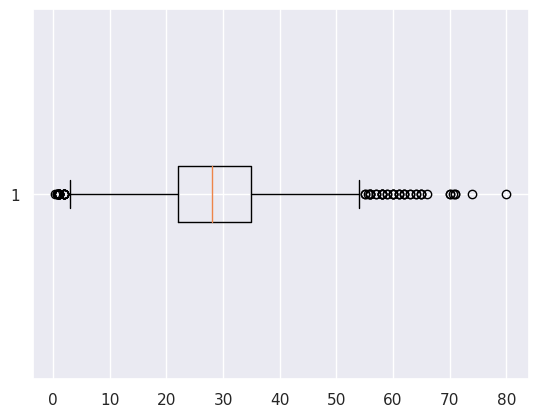

In [36]:
# Boxplot of Age column.
plt.boxplot(df_clean["Age"].dropna(), vert=False)
plt.show()

In [37]:
# IQR calculations
Q1 = np.quantile(df_clean["Age"], q=0.25)
print(f"Quantile 0.25 : {Q1}")
Q3 = np.quantile(df_clean["Age"], q=0.75)
print(f"Quantile 0.75 : {Q3}")
IQR = Q3 - Q1
print(f"IQR : {IQR}")

# Upper limit and Lower limit calculations
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(f"Upper Limit is {upper_limit} and Lower Limit is {lower_limit}")

outlier_index = (df_clean["Age"] < lower_limit)| (df_clean["Age"] > upper_limit)
df_clean[outlier_index]

# delete the outliers.
df_clean_full = df_clean[~outlier_index].reset_index(drop=True)

Quantile 0.25 : 22.0
Quantile 0.75 : 35.0
IQR : 13.0
Upper Limit is 54.5 and Lower Limit is 2.5


With Outliers


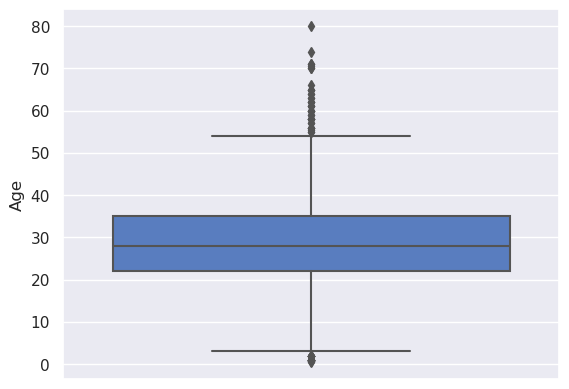

Without Outliers


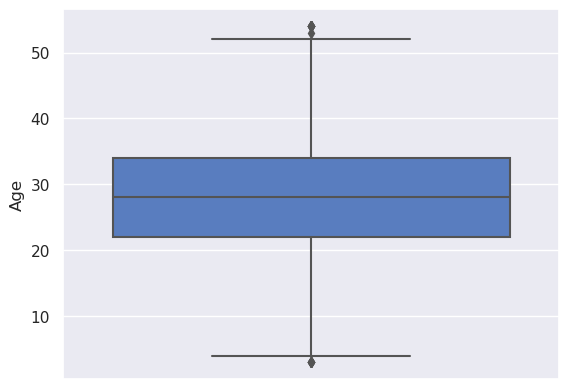

Before delete outliers


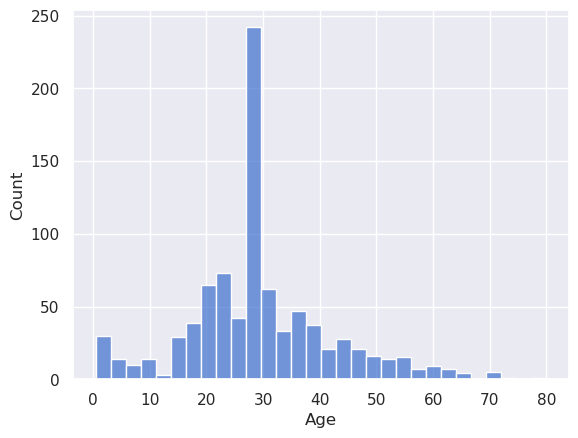

After delete outliers


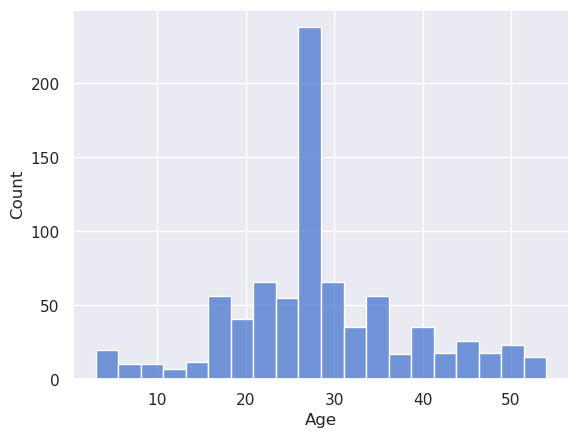

In [38]:
print("With Outliers")
sns.boxplot(data=df_clean, y="Age")
plt.show()

print("Without Outliers")
sns.boxplot(data=df_clean_full, y="Age")
plt.show()

print("Before delete outliers")
sns.histplot(data=df_clean, x="Age")
plt.show()
print("After delete outliers")
sns.histplot(data=df_clean_full, x="Age")
plt.show()

**Last analysis on Numerical columns**

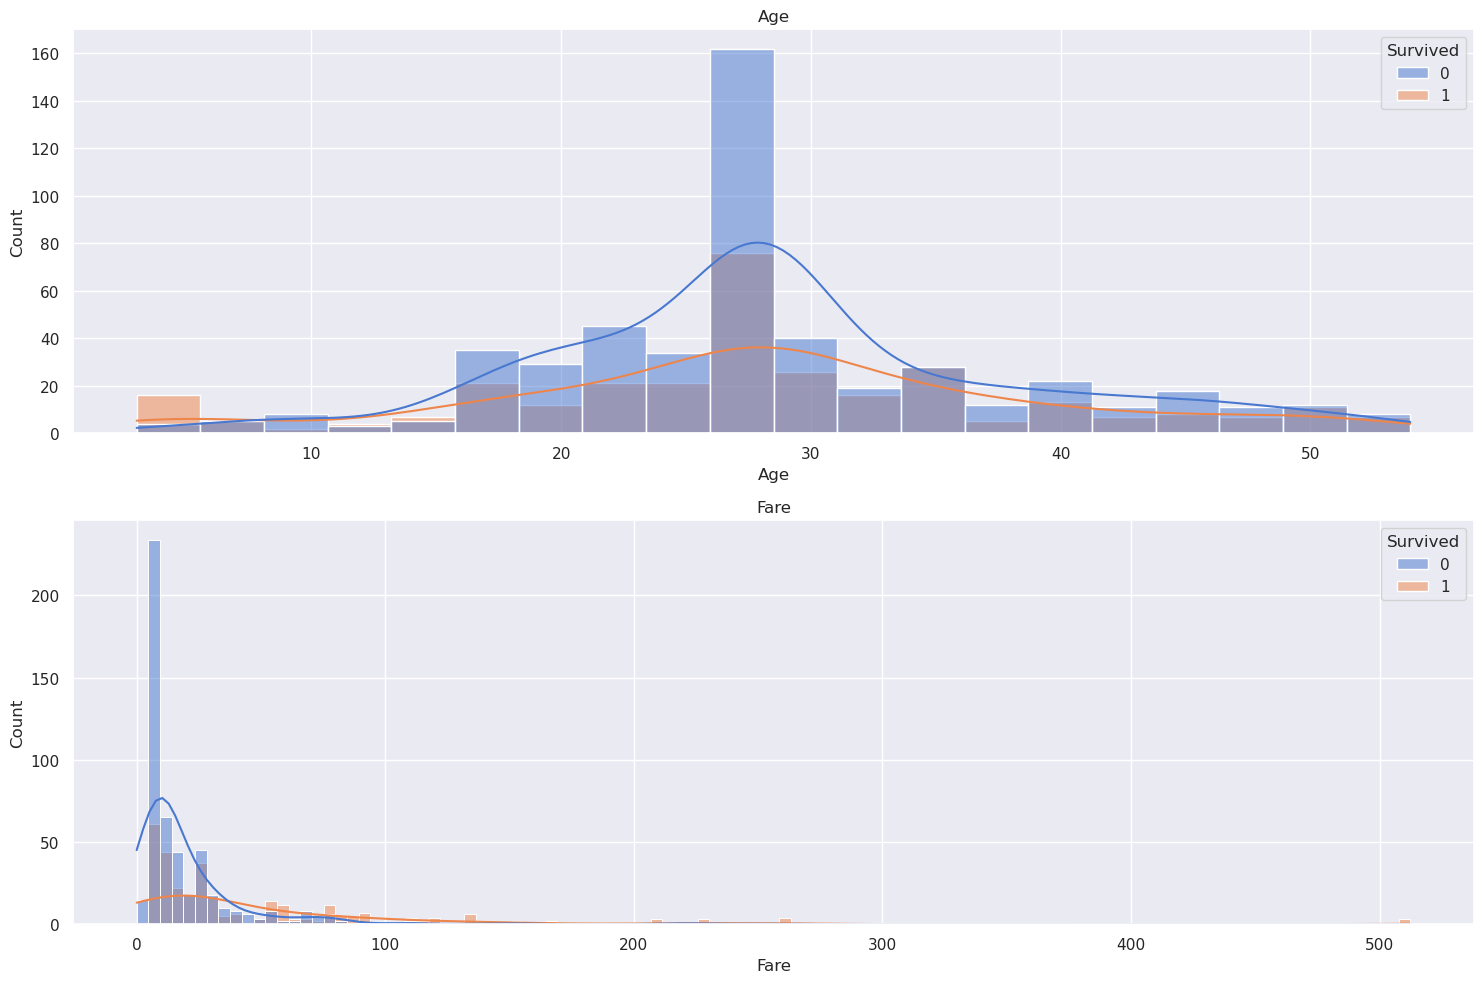

In [39]:
num_col = ['Age','Fare']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

for i, col in enumerate(num_col):
    sns.histplot(data=df_clean_full, x=col,hue='Survived', ax=axes[i],kde=True)
    axes[i].set_title(col)

fig.tight_layout()
plt.show()

**Same things for test dataset**

In [40]:
print(test.info())
print(test.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
0


In [41]:
# Deleted the Cabin column
test = df.drop("Cabin", axis=1)
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
# Get the observations with missing values in the "Embarked" column.
embarked_na_index = test[test["Embarked"].isnull()].index
print(embarked_na_index)

# We are dropping these observations.
test = test.drop(index=embarked_na_index, axis=0).reset_index()
test.head()

Int64Index([61, 829], dtype='int64')


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
# Get the indices of NA values in the Age column.
age_na_index = test[test["Age"].isnull()].index

# Calculate the median of the Age column.
median_age = test["Age"].median()

# Replace the missing values in the Age column with the median.
for i in age_na_index:
    test["Age"][i] = median_age

In [44]:
test = test.drop(columns=["index"], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [45]:
test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
# IQR calculations
Q1 = np.quantile(test["Age"], q=0.25)
print(f"Quantile 0.25 : {Q1}")
Q3 = np.quantile(test["Age"], q=0.75)
print(f"Quantile 0.75 : {Q3}")
IQR = Q3 - Q1
print(f"IQR : {IQR}")

# Upper limit and Lower limit calculations
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(f"Upper Limit is {upper_limit} and Lower Limit is {lower_limit}")

outlier_index = (test["Age"] < lower_limit)| (test["Age"] > upper_limit)
df_clean[outlier_index]

# delete the outliers.
test = test[~outlier_index].reset_index(drop=True)

Quantile 0.25 : 22.0
Quantile 0.75 : 35.0
IQR : 13.0
Upper Limit is 54.5 and Lower Limit is 2.5


Without Outliers


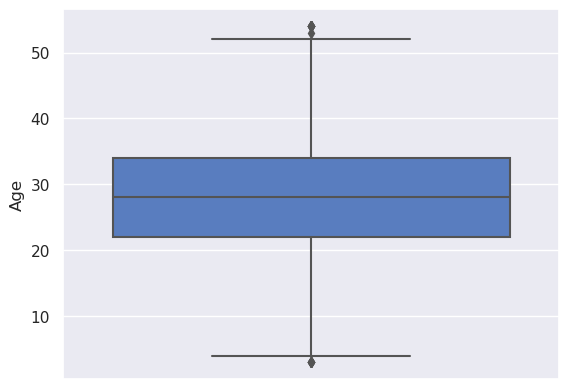

After delete outliers


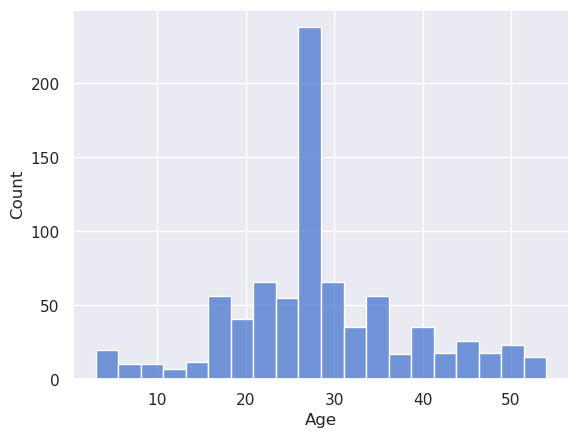

In [47]:
print("Without Outliers")
sns.boxplot(data=test, y="Age")
plt.show()

print("After delete outliers")
sns.histplot(data=test, x="Age")
plt.show()

# 4. Model

In [48]:
df_clean_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 4.1. Logistic Regression Model

In [49]:
y = df_clean_full["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(df_clean_full[features], drop_first=True)
X_test = pd.get_dummies(test[features])

log = LogisticRegression(solver = 'liblinear')
log_model = log.fit(X,y)

# intercept of model
print("Intercept of Logistic Regression model : ",log_model.intercept_)

# coef of model
print("Coeficients of Logistic Regression model :",log_model.coef_)

y_pred = log_model.predict(X)

#Accuracy score of our model.
print(f"Accuracy score of Logistic Regression model is {accuracy_score(y, y_pred)}\n\n")

# Classification report.
print(f"Classification Report of Logistic Regression model \n{classification_report(y, y_pred)}")

Intercept of Logistic Regression model :  [3.55982614]
Coeficients of Logistic Regression model : [[-0.8159327  -0.01897808 -0.27063549 -0.11599827  0.00534558 -2.5427529
   0.13706232 -0.18143908]]
Accuracy score of Logistic Regression model is 0.8046116504854369


Classification Report of Logistic Regression model 
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       511
           1       0.77      0.69      0.73       313

    accuracy                           0.80       824
   macro avg       0.80      0.78      0.79       824
weighted avg       0.80      0.80      0.80       824



**ROC Curve**

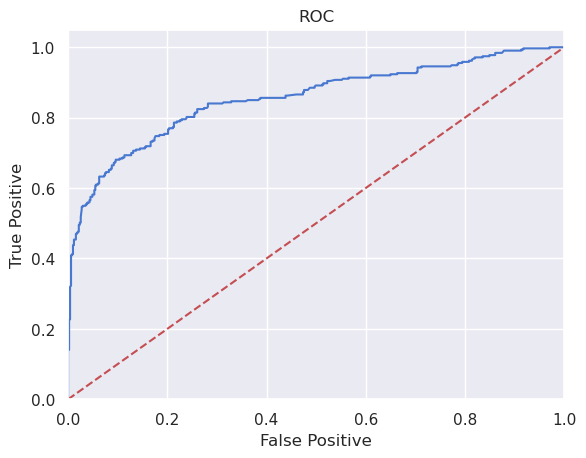

In [50]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.show()

**Model Validation and Tuning**

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=40)

log = LogisticRegression(solver='liblinear')
log_model = log.fit(X_train, y_train)

# Accuracy score of model
print("Accuracy score : ",accuracy_score(y_valid, log_model.predict(X_valid)))

# Accuracy score of model vith cross validation
print("Accuracy score with Cross Validation : ",cross_val_score(log_model, X_valid, y_valid, cv=10).mean())

Accuracy score :  0.8185483870967742
Accuracy score with Cross Validation :  0.8153333333333332


In [52]:
# Create a Logistic Regression model
log = LogisticRegression(solver='liblinear')

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=40)

# Hyperparameter tuning to select the best C parameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(log, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best C value from the grid search
best_C = grid_search.best_params_['C']

# Train the model with the best C value
tuned_log_model = LogisticRegression(solver='liblinear', C=best_C)
tuned_log_model.fit(X_train, y_train)

# Print the model's intercept and coefficients
print("Intercept of Logistic Regression model : ", tuned_log_model.intercept_)
print("Coefficients of Logistic Regression model :", tuned_log_model.coef_)

# Measure the model's performance on the training set
y_pred_train = tuned_log_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy score of Logistic Regression model on training set is {train_accuracy}")

# Measure the model's performance on the validation set
y_pred_valid = tuned_log_model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"Accuracy score of Logistic Regression model on validation set is {valid_accuracy}")

# Evaluate the model's performance with k-fold cross-validation on the validation set
cross_val_scores = cross_val_score(tuned_log_model, X_valid, y_valid, cv=10)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy with Cross Validation:", cross_val_scores.mean())

Intercept of Logistic Regression model :  [0.7574016]
Coefficients of Logistic Regression model : [[-2.61220512e-01  3.20532911e-04 -2.70478532e-01  2.11543105e-02
   1.17353404e-02 -1.65304554e+00  2.04603850e-01  7.22287560e-02]]
Accuracy score of Logistic Regression model on training set is 0.8038194444444444
Accuracy score of Logistic Regression model on validation set is 0.8145161290322581
Cross-Validation Scores: [0.8  0.84 0.92 0.84 0.56 0.76 0.68 0.72 0.75 0.75]
Mean Accuracy with Cross Validation: 0.762


## 4.2. Gaussian Naive Bayes

In [53]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [54]:
print(output)

     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
819          887         0
820          888         1
821          889         0
822          890         0
823          891         0

[824 rows x 2 columns]
